<a href="https://colab.research.google.com/github/nathsmo/Elements-of-ML/blob/master/Tarea1_Nathalia_Morales_EoML_UFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Haz una copia de este notebook. Responde a las preguntas conceptuales agregando una célula de texto, y las preguntas de aplicación usando código o texto como te parezca conveniente. Las preguntas son adaptadas del libro ¨Introduction to Statistical Learning¨ de  Gareth James, Daniela Witten, Trevor Hastie y Robert Tibshirani (http://www-bcf.usc.edu/~gareth/ISL/data.html)

# Tarea 1. Elements of Machine Learning. UFM

- - -
# Conceptual

## 1:
Para cada uno de los siguientes, indica si en general esperarías que un método de aprendizaje flexible le iría mejor que a uno inflexible en cada caso. Justifica tus respuestas:



> a. El tamaño muestral $n$ es extremadamente pequeño, y el número de predictores $p$ es pequeño
*  R - Flexible pues la gráfica del caso se adaptaría al tamaño de la muestra a cambio de hacer una generalización de una cantidad pequeña de data.

> b. El número de predictores $p$ es extremadamente grande, y el número de observaciones $n$ es pequeño
*  R - En este caso usaría un método de aprendizaje flexible porque como se tienen tantos predictores entonces se tendrían demasiados planos lo que provocaría que se necesite adaptar el método de aprendizaje a las diferentes dimensiones pues mientras que si hubiera un número pequeño de predictores sería más fácil usar una inflexible.

> c. La relación entre los predictores y la respuesta es altamente no-lineal
* R -  Usaría un método de aprendizaje flexible pues dado que la relación es no-lineal su modo de aprendizaje debe adaptarse a la forma que los datos tomen y esto tiende a un modelo flexible.

> d. La varianza de los errores aleatorios, $\mathbb{V}[\epsilon]$, es extremadamente alta
*  R - Si la varianza de los errores aleatorios son tan altos entonces no sería tan confiable podes usar un modelo de vecinos cercanos porque se estarpia sesgando el método de aprendizaje de los datos mientras que de por si, bajo mi conocimiento podría ser incluso menos difícil pero un poco mpas efectivo el uno de un método flexible aún así la varianza de los errores aleatorios crearía bastante ruido con el que se tienen que lidiar. 



## 2:
El DataFrame generado en el siguiente código contiene train data con seis observaciones: tres predictores $X_1$, $X_2$, y $X_3$ y una variable de respuesta cualitativa $Y$. Imagina que queremos usar esta información para hacer predicciones de Y cuando $X_1=X_2=X_3=0$ usando K-nearest neighbors

In [0]:
from __future__ import print_function

import pandas as pd
pd.__version__

X_1 = pd.Series([0,2,0,0,-1,1])
X_2 = pd.Series([3,0,1,1,0,1])
X_3 = pd.Series([0,0,3,2,1,1])
Y = pd.Series(['Red','Red','Red','Green','Green','Red'])

TrainData = pd.DataFrame({"X_1":X_1, "X_2":X_2, "X_3":X_3, "Y":Y})

> a. Evalúa la distancia euclidiana entre cada observación y el origen $X_1=X_2=X_3=0$
*  Ver tabla TrainData

> b. ¿Qué predicción harías para K = 1? ¿Por qué?
* Se podría decir que el modelo se sobreajustaría a la data de entrenamiento, según el libro cuando un modelo de entrenamiento tiene el parámetro de K = 1, el límite de decisión es sobre-flexible y encuentra patrones que no corresponden al modelo de Bayes.

> c. ¿Qué predicción harías para K = 3? ¿Por qué?
* Como el ejemplo en el libro K = 3 sería un buen número de vecinos para predecir el comportamiento de la data real a partir de la data de entrenamiento que se tiene.

> d. Si la frontera de decisión de Bayes en este problema es altamente no-lineal, ¿esperaríamos entonces que el mejor valor de K sea grande o pequeño? ¿Por qué?
* Se esperaría un número de K pequeño pues mientras K crece el método se vuelve menos flexible y se crea un límite de decisión más inclinado a uno linear. 


In [0]:
td0 = (0, 3, 0)
td1 = (2, 3, 0)
td2 = (0, 1, 3)
td3 = (0, 1, 2)
td4 = (-1, 0, 1)
td5 = (1, 1, 1)

b = (0, 0, 0)
dst0 = distance.euclidean(td0, b)
dst1 = distance.euclidean(td1, b)
dst2 = distance.euclidean(td2, b)
dst3 = distance.euclidean(td3, b)
dst4 = distance.euclidean(td4, b)
dst5 = distance.euclidean(td5, b)

l = []
l.append(dst0)
l.append(dst1)
l.append(dst2)
l.append(dst3)
l.append(dst4)
l.append(dst5)

TrainData['Distance'] = pd.Series(l, index=TrainData.index)

TrainData

,X_1,X_2,X_3,Y,Distance
0,0,3,0,Red,3.000000
1,2,0,0,Red,3.605551
2,0,1,3,Red,3.162278
3,0,1,2,Green,2.236068
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051


## 3:

**Ejercicio 2.4.2**

Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.

1. We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.
         * Classification
         * Inference
         * n - 500 firms
         * p - Profit, Number of employees, industry and CEO salary

* We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.
        * Regression
        * Prediction
        * n - 20 products
        * p - Success or failure, Price, marketing budget, competition price + 10.

* We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.
        * Regression
        * Prediction
        * n - Weekly data
        * p - % change in the dollar, % change in the US market, % change in british market...

## 4:

**Ejercicio 2.4.4**

A. Describe three real-life applications in which classification might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.
  1. Application: Queremos saber qué area de una ciudad tendrá los precios más altos en ventas de casa en un futuro.
    * Response: Nombre del área.
    * Predictors: áreas, cantidad que se quería, cantidad por la que se vendió, calidad de la casa, año de construccion de la casa, cantidad de personas que vivirán en la casa.
    * Prediction.
    * Why? Porque se necesita anticipar una necesidad antes de que aparezca de acuerdo con la data previamente recolectada.
  
  2. Application: Queremos sabre qué tipo de tienda sería mejor para un centro comercial actual.
    * Response: Categoría de tienda (belleza, ropa, deporte, actividades recreativas, restaurante)
    * Predictors: Categoría de tiendas, cantidad que venden, tipo de productos que venden, cambio de trafico desde que entraron al centro comercial, edad de la audiencia, porcentaje que contribuye al trafico en el centro comercial.
    * Inference
    * Why? Porque a través de respuestas pasadas queremos ver si una tienda parecida a las pasadas afectará el trafico de personas en el centro comercial y la cantidad que gastan.
    
  3. Application: Queremos encontrar si un tipo de costura afecta en la compra de una prenda.
    * Response: Mayores ventas en la prenda
    * Predictors: Tipo de costura, costo de costura, tiempo que se llevó en hacer, cantidad de ventas de la prenda.
    * Inference
    * Why? Porque queremos ver si el cambio en un factor de un mismo producto cambia el outcome que tiene.
  

B. Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

  1. Application: Porcentaje de asistencia en clases de matemáticas.
    * Response: Cambio en el porcentaje.
    * Predictors: Cantidad de gente en la clase, nombre de la clase, dificultad de una clase, cantidad de gente por clase, numero de clases, cantidad de años que el profesor ha dado la clase.
    * Inferencia
    * Why? De acuerdo con la data pasada de las clases se quiere ver si un cambio en la dificultad de la clase se puede cambiar el porcentaje de asistencia en la clase. 
  
  2. Application: La probabilidad de compatibilidad entre personas en un dating site.
    * Response: probabilidad de acceptación.
    * Predictors: Sobre los "match" pasados ----- tez, color de ojos, profesión, tiempo que lleva en el app, cantidad de match pasados, religión, intereses...
    *  Prediction.
    * Why? A partir de eventos pasados queremos predecir la reacción anticipada de una persona hacia un evento nuevo.
    
  3. Application:  Probabilidad de le guste al usuario una cierta serie.
    * Response: Si el usuario mira o no la serie. O el rating que le da.
    * Predictors: Tipo de serie, edad de los personajes, cantidad de temporadas, categoría de la serie, edad de la serie, tema de la serie, si sus amigos vieron la serie o no, etc.
    * Prediction.
    * Why? Queremos saber si le podría gustar o no la serie según sus preferencias pasadas.

C. Describe three real-life applications in which cluster analysis might be useful.

  1. Application: Tipo de pacientes que tienen en común síntomas entre cáncer de estómago.
  
  2. Application: Segmento del mercado que comparten intereses entre el área de arte digital y producción cinematográfica.
    
  3. Application: Grupo de estudiantes que necesitan atención especial y su actitud psicológica.

- - -
# Aplicado

## 5:
Use los datos en el archivo College.csv encontrado en el enlace http://www-bcf.usc.edu/~gareth/ISL/data.html. Puede descargar el archivo csv y subirlo a su sesión de Google Colab de la siguiente manera:

```python
from google.colab import files 
upload = files.upload()
```

Le pedirá elegir un archivo, el cual debe de ser el archivo que descargó previamente. Use `panda` para explorarlo como DataFrame y notar que contiene 18 variables para 777 diferentes universidades en Estados Unidos. Las variables son


*   *Private*: Public/private
*   *Apps*: Número de aplicaciones
*   *Accept*: Número de aplicaciones aceptadas
*   *Enroll*: Número de estudiantes inscritos
*   *Top10perc*: Nuevos estudiantes del top 10% de su clase de secundaria
*   *Top25perc*: Nuevos estudiantes del top 25% de su clase de secundaria
*   *F.Undergrad*: Número de undergrads de tiempo completo
*   *P.Undergrad*: Número de undergrads de tiempo parcial
*   *Outstate*: Out-of-state tuititon
*   *Room.Board*: Costos de cuarto
*   *Books*: Costos de libros estimados
*   *Personal*: Costos personales estimados
*   *PhD*: Porcentaje de la facultad con PhD's
*   *Terminal*: Porcentaje de la facultad con título más alto en su disciplina
*   *S.F.Ratio*: Razón entre estudiantes y miembros de la facultad
*   *perc.alumni*: Porcentaje de alumnos que hacen donaciones
*   *Expend*: Gastos de instrucción por estudiante
*   *Grad.Rate*: Razón de alumnos graduados


In [0]:
from google.colab import files 
upload = files.upload()

Saving College.csv to College.csv


In [0]:
import pandas as pd
college = pd.read_csv('College.csv')

> a. Explora los datos usando panda y las funciones .describe(), head().

In [0]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [0]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000



> b. Agrega una nueva serie con el porcentaje de aplicaciones aceptadas calculado a partir de las variables en el archivo

In [0]:
college['Percentage App Acceptadas'] = college['Accept']/college['Apps']
college.head()


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,App Acceptadas,Percentage App Acceptadas,P Enroll rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,2200,70,78,18.1,12,7041,60,0.742169,0.742169,0.585227
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,1500,29,30,12.2,16,10527,56,0.880146,0.880146,0.266112
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,1165,53,66,12.9,30,8735,54,0.768207,0.768207,0.306290
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,...,875,92,97,7.7,37,19016,59,0.836930,0.836930,0.392550
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,...,1500,76,72,11.9,2,10922,15,0.756477,0.756477,0.376712


> c. Haz un histograma del porcentaje de aplicaciones aceptadas usando la función .hist('-') donde '-' es la variable que creaste en b

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba5a1d4f60>]],
      dtype=object)

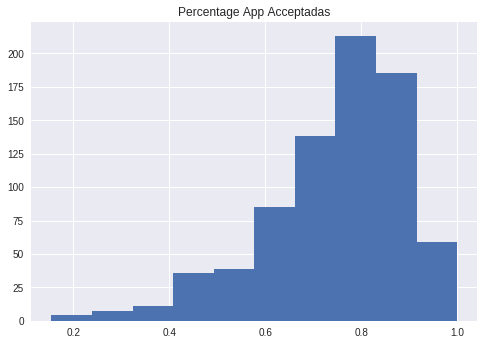

In [0]:
college.hist('Percentage App Acceptadas')

> d. ¿Qué observaciones tienes sobre las 777 universidades luego de explorar los datos?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba56d56d30>]],
      dtype=object)

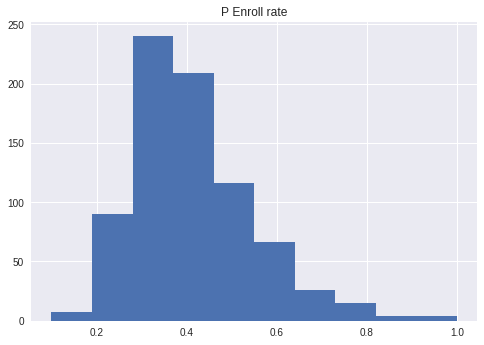

In [0]:
college['P Enroll rate'] = college['Enroll']/college['Accept']
college.hist('P Enroll rate')

In [0]:
list(college.columns.values)

['Unnamed: 0',
 'Private',
 'Apps',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F.Undergrad',
 'P.Undergrad',
 'Outstate',
 'Room.Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S.F.Ratio',
 'perc.alumni',
 'Expend',
 'Grad.Rate',
 'App Acceptadas',
 'Percentage App Acceptadas',
 'P Enroll rate']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba56cceba8>]],
      dtype=object)

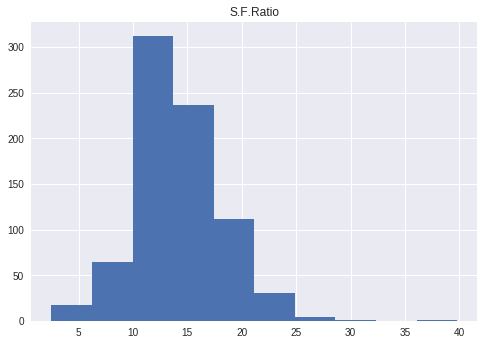

In [0]:
college.hist('S.F.Ratio')

* La gran mayoría de universidades tienen un 80% de acceptance rate.
* Mientras que de las personas aceptadas solo un 30% - 35% de ellas entran a las universidades.
* La gran mayoría de universidades tienen entre 10 a 20 miembros de la facultad por cada 100 alumnos.
* El número máximo de personas en PhD es 103.
* El porcentaje máximo de alumni dentro de una universidad es 63%, y la media es 22% lo que indica que los miembros de la universidad son mayormente externos.
* La media de graduación es 65% y el mínimo es 10% por lo que se puede pensar que una gran mayoría de personas se retrasan o no se gradúan, sería interesante saber las razones de porque esto pasa.
* Algo interesante de la data es que hay 118% de graduación en una universidad lo que significa que hay una comparación de estudiantes de entrada y de salida en donde se acumulan estudiantes retrasados y puede que esta sea la razon de que el porcentaje sea mayor a 100%.